# PyORBIT output.mat comparison

### Stage 2 of merge: merged at PyORBIT level

Compare:
- **CERN_new 07**: new PTC + CERN Merged PyORBIT (master + newPTC branch) MAD-X v5.06.01 @(6.07, 6.24)
- **CERN_new 21**: new PTC + CERN Merged PyORBIT (master + newPTC branch) MAD-X v5.06.01 @(6.21, 6.24)
- **MD4224 07**: old PTC + CERN PyORBIT (Original - used for PS simulation campaign and benchmarked) @(6.07, 6.24)
- **MD4224 21**: old PTC + CERN PyORBIT (Original - used for PS simulation campaign and benchmarked) @(6.21, 6.24)

Not used:
- **OG**: old PTC + CERN PyORBIT (Original - used for PS simulation campaign and benchmarked)
- **CERN_oldPTC_RO 07**: Same as **OG** without sextupole ramp component @(6.07, 6.24)
- **CERN_oldPTC_RO 21**: Same as **OG** without sextupole ramp component @(6.21, 6.24)
- **newPTC_oldMADX**: new PTC + CERN Merged PyORBIT (master + newPTC branch) MAD-X v5.02.00
- **newPTC_newMADX**: new PTC + CERN Merged PyORBIT (master + newPTC branch) MAD-X v5.06.01

## Notes:
- Simulations use independently generated distributions
- Initial distributions are matched to the initial PTC twiss (main_sim/PTC_Twiss/1.ptc) which is the lattice without injection bump applied
- Here we use the operational working point ($Q_x, Q_y$) = (6.21, 6.24) and the most extreme horizontal working point in the MD4224 study ($Q_x, Q_y$) = (6.07, 6.24) which have been benchmarked against measurements
- No major modifications have been made to the new simulations, only those to enable the use of the newPTC PyORBIT version

In [1]:
import os
import glob
import imageio
import pickle
import pandas as pd
import numpy as np
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
#plt.rcParams['figure.figsize'] = [10.0, 8.0]
#plt.rcParams['figure.dpi'] = 200
#plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5

fig_x = 12.
fig_y = 8.

In [3]:
def round_sig(x, sig=3):
        return round(x, sig-int(floor(log10(abs(x))))-1)
    
def is_non_zero_file(fpath):  
        print ('\n\t\t\tis_non_zero_file:: Checking file ', fpath)
        print ('\n\t\t\tis_non_zero_file:: File exists = ', os.path.isfile(fpath))
        print ('\n\t\t\tis_non_zero_file:: Size > 3 bytes = ', os.path.getsize(fpath))
        return os.path.isfile(fpath) and os.path.getsize(fpath) > 3

In [4]:
def add_input_file(dd, filename, label):
    f = filename
    p = dict()
    sio.loadmat(f, mdict=p)
    dd[label] = p
    print ('\tAdded output data from ', filename, '\t dictionary key: ', label)
    return dd

In [5]:
def make_directory(path):
    if os.path.isdir(path):
        print ("Directory %s already exists" % path)  
    else:
        try:
            os.mkdir(path)
        except OSError:
            print ("Creation of the directory %s failed" % path)
        else:
            print ("Successfully created the directory %s" % path)  

In [6]:
dd1 = dict()

#dd1 = add_input_file(dd1, 'oldPTC/0_H_21/PyORBIT/output/output.mat', 'OG')
#dd1 = add_input_file(dd1, 'newPTC/0_H_07/PyORBIT/output/output.mat', 'newPTC_oldMADX')
#dd1 = add_input_file(dd1, 'newPTC_newMADX/0_H_07/PyORBIT/output/output.mat', 'newPTC_newMADX')
#dd1 = add_input_file(dd1, 'CERN_oldPTC/0_H_21/PyORBIT/output/output.mat', 'CERN_OG')
#dd1 = add_input_file(dd1, '../../../../00_NewPTC_Test/PS_Injection_Bump/CERN_newPTC/1_H_07/PyORBIT/output/output.mat', 'Merge1 CERN_newPTC 07')
#dd1 = add_input_file(dd1, '../../../../00_NewPTC_Test/PS_Injection_Bump/CERN_newPTC/1_H_21/PyORBIT/output/output.mat', 'Merge1 CERN_newPTC 21')
#dd1 = add_input_file(dd1, './CERN_oldPTC_Ramp_Only/0_H_07/PyORBIT/output/output.mat', 'CERN_oldPTC_RO 07')
#dd1 = add_input_file(dd1, './CERN_oldPTC_Ramp_Only/0_H_21/PyORBIT/output/output.mat', 'CERN_oldPTC_RO 21')
dd1 = add_input_file(dd1, '../../../../00_NewPTC_Test/PS_Injection_Bump/MD4224/1_H_07/output.mat', 'OG MD4224 07')
dd1 = add_input_file(dd1, '../../../../00_NewPTC_Test/PS_Injection_Bump/MD4224/1_H_21/output.mat', 'OG MD4224 21')
dd1 = add_input_file(dd1, './1_H_07/PyORBIT/output/output.mat', 'Merge2 MADX 5.8.01 07')
dd1 = add_input_file(dd1, './1_H_21/PyORBIT/output/output.mat', 'Merge2 MADX 5.8.01 21')
#dd1 = add_input_file(dd1, '../SCARF_Merged_HR_PyORBIT_MADX_5_6_01/0_H_07/PyORBIT/output/output.mat', 'Merged MADX 5.6.01 07')



	Added output data from  ../../../../00_NewPTC_Test/PS_Injection_Bump/MD4224/1_H_07/output.mat 	 dictionary key:  OG MD4224 07
	Added output data from  ../../../../00_NewPTC_Test/PS_Injection_Bump/MD4224/1_H_21/output.mat 	 dictionary key:  OG MD4224 21
	Added output data from  ./1_H_07/PyORBIT/output/output.mat 	 dictionary key:  Merge2 MADX 5.8.01 07
	Added output data from  ./1_H_21/PyORBIT/output/output.mat 	 dictionary key:  Merge2 MADX 5.8.01 21


In [7]:
#dd1['OG'].keys()

In [8]:
sc = 'SC'
legend_label = 'Case'
main_label = 'PTC Test: PS IB'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 30
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
#betagamma = 2.492104532 * 0.9159915293879255
save_folder = 'Plots_SC'
make_directory(save_folder)

Successfully created the directory Plots_SC


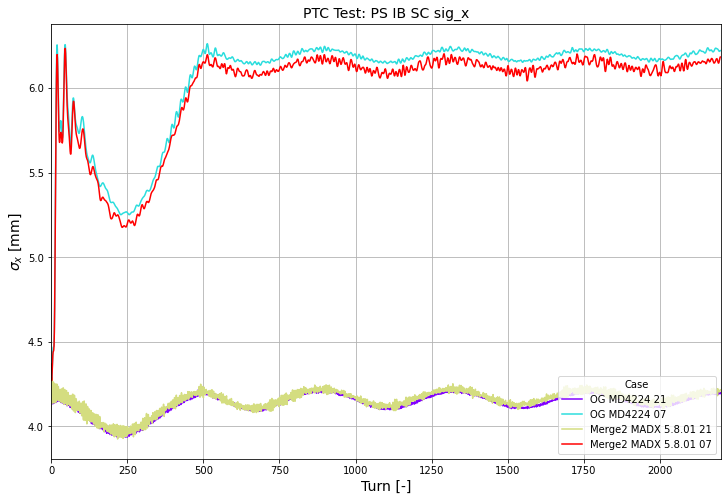

In [9]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

(3.0, 5.0)

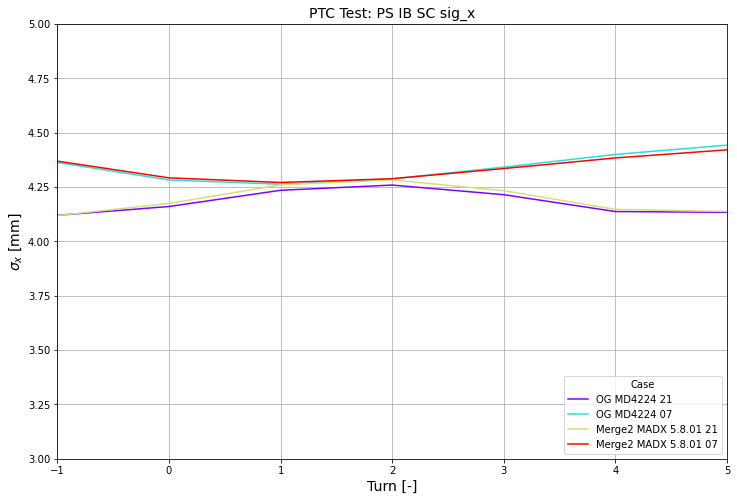

In [10]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,5)
ax1.set_ylim(3,5)

#savename = save_folder +'/' + parameter + '.png'
#plt.savefig(savename);

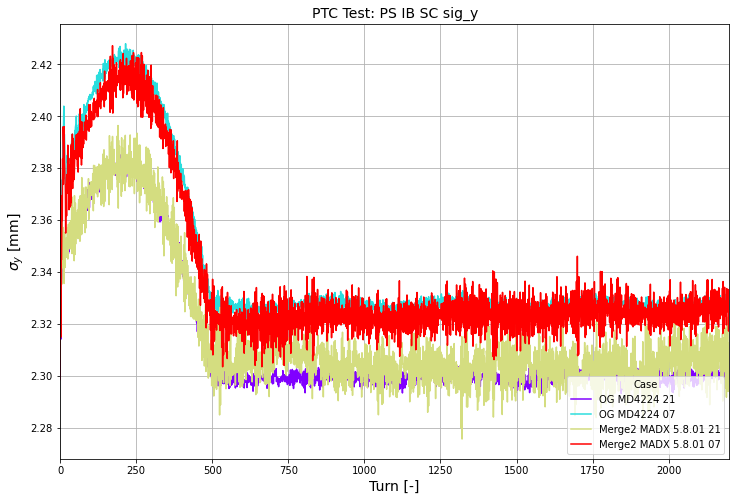

In [11]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

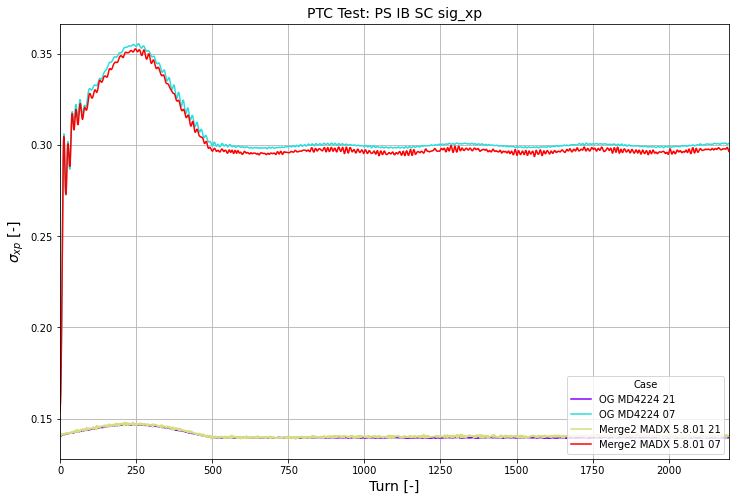

In [12]:
parameter = 'sig_xp'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_{xp}$ [-]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

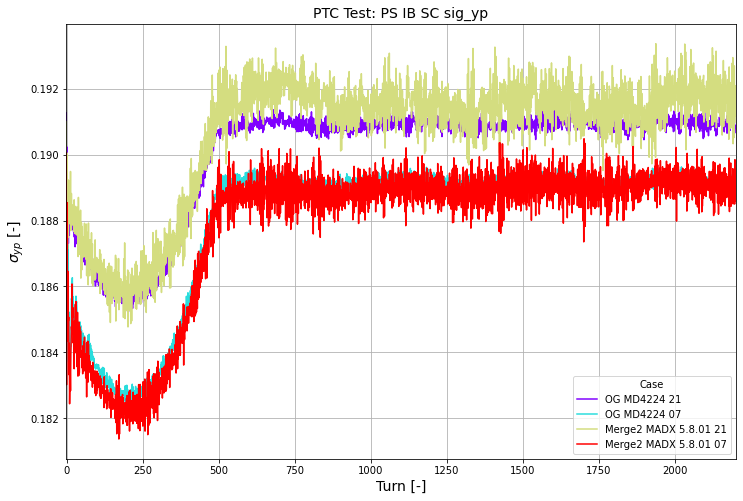

In [13]:
parameter = 'sig_yp'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_{yp}$ [-]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

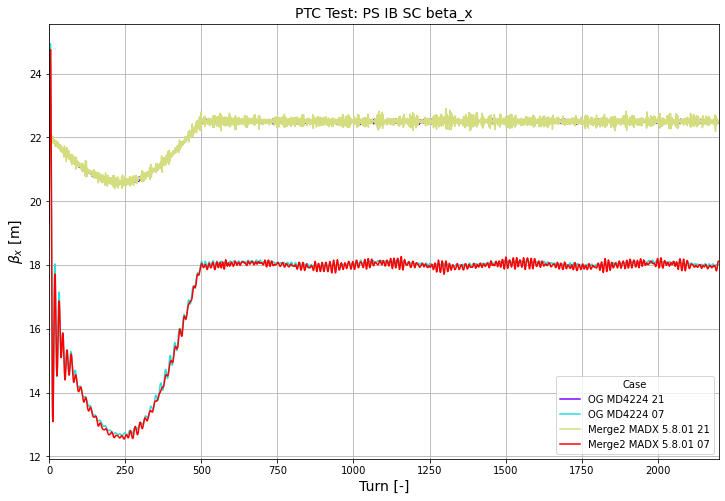

In [14]:
parameter = 'beta_x'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

(-1.0, 10.0)

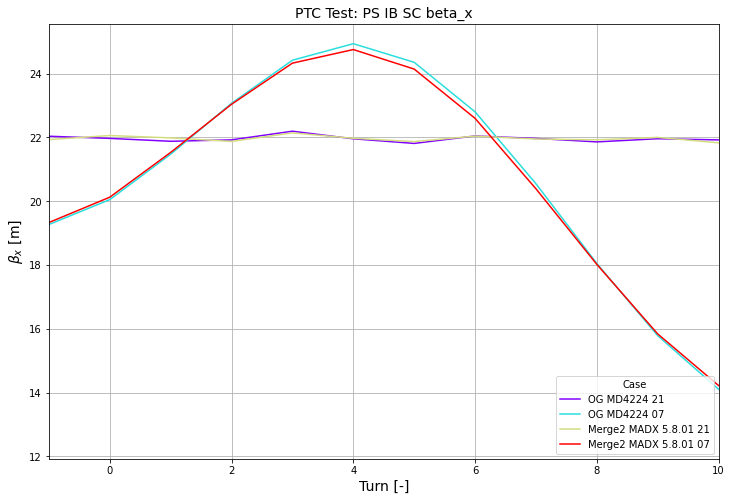

In [15]:
parameter = 'beta_x'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,10)
#ax1.set_ylim(3,3.5)

#savename = save_folder +'/' + parameter + '.png'
#plt.savefig(savename);

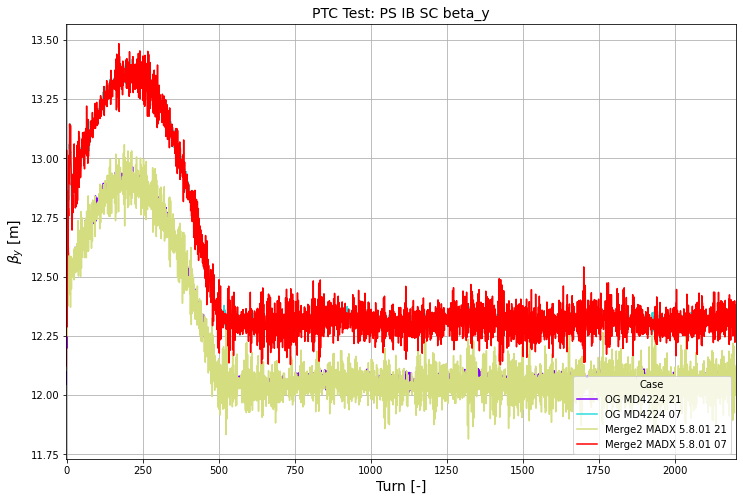

In [16]:
parameter = 'beta_y'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

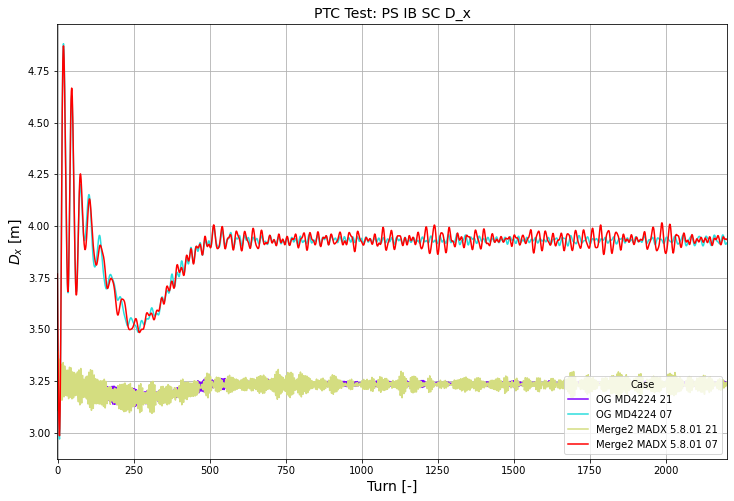

In [17]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

(-1.0, 10.0)

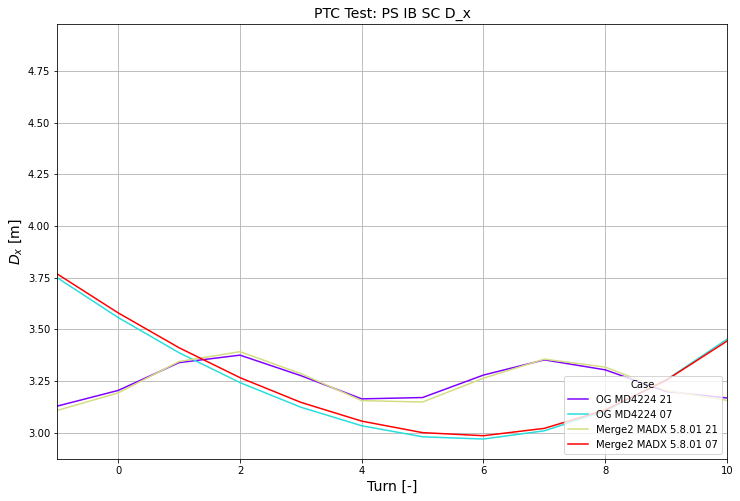

In [18]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,10)
#ax1.set_ylim(3,3.5)

#savename = save_folder +'/' + parameter + '.png'
#plt.savefig(savename);

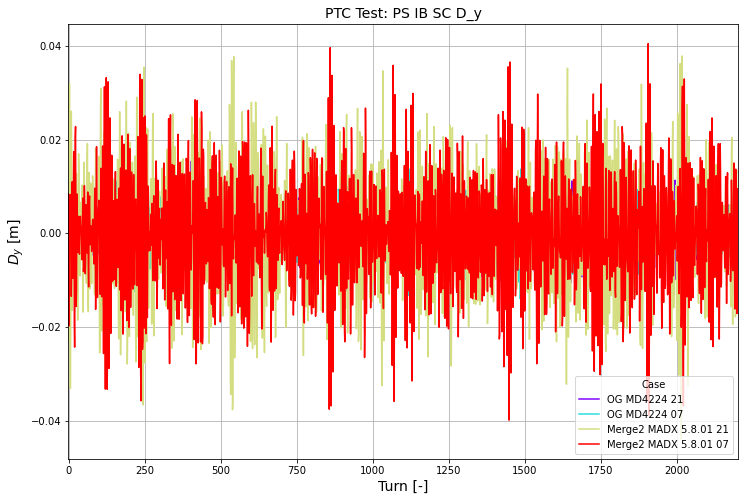

In [19]:
parameter = 'D_y'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

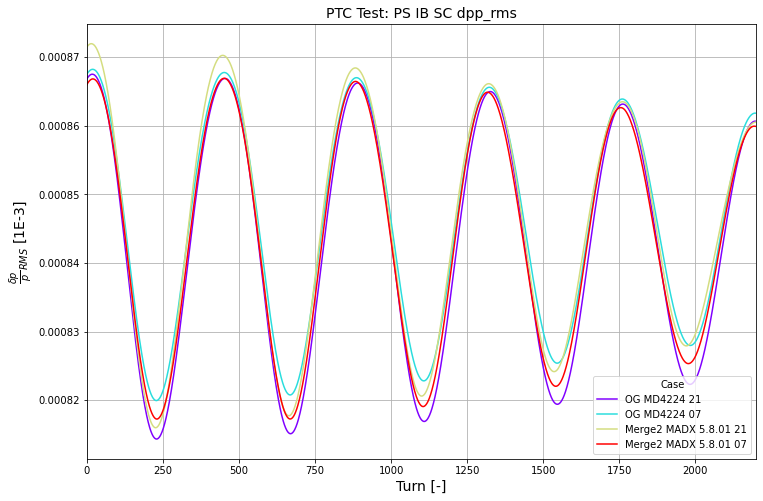

In [20]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

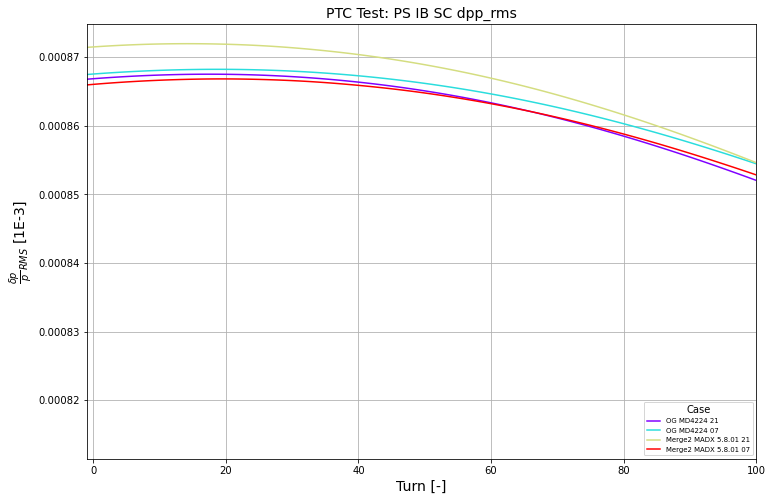

In [21]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,100)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

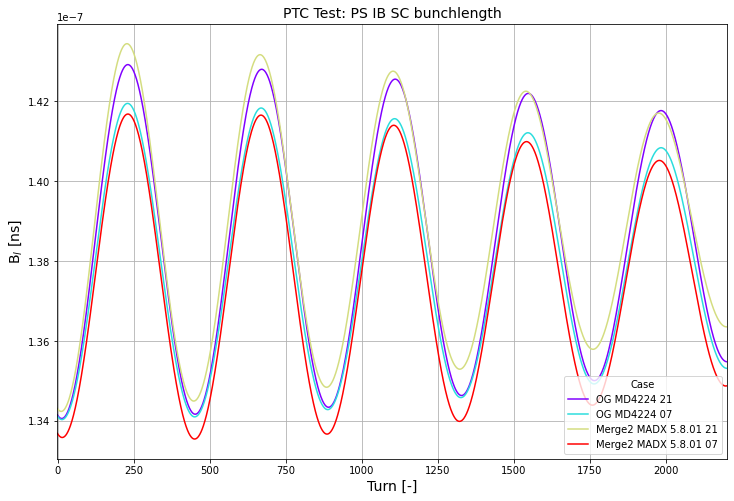

In [22]:
parameter = 'bunchlength'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'B$_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

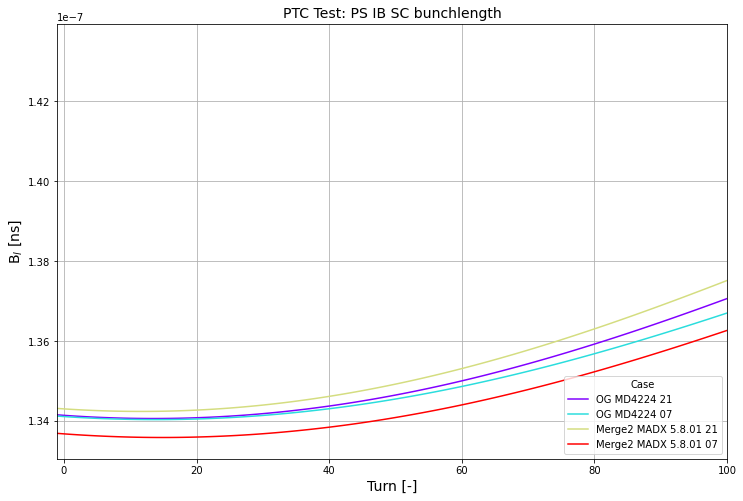

In [23]:
parameter = 'bunchlength'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'B$_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,100)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

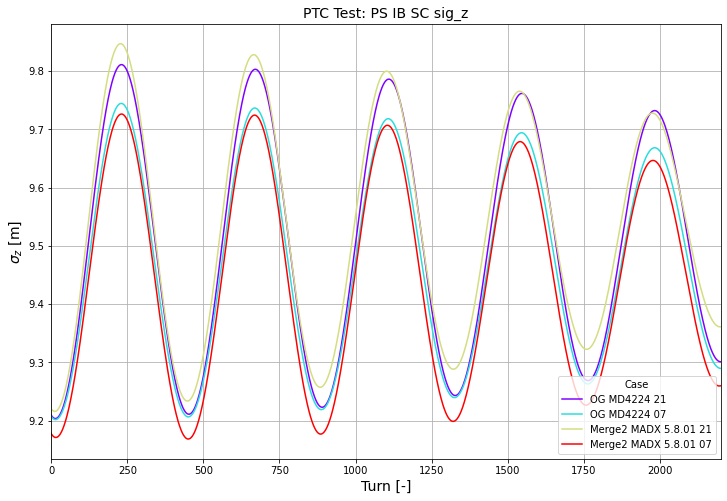

In [24]:
parameter = 'sig_z'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_z$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

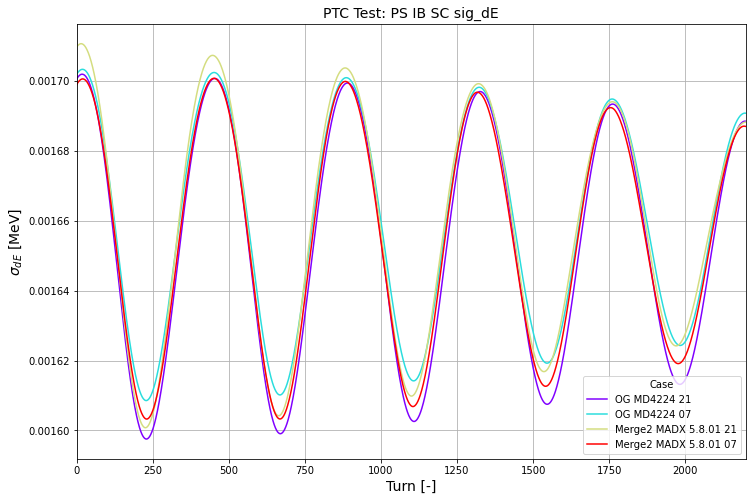

In [25]:
parameter = 'sig_dE'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_{dE}$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

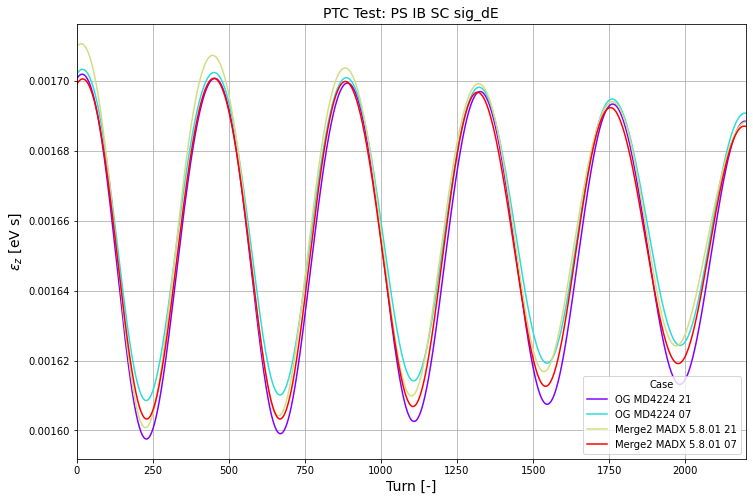

In [26]:
parameter = 'sig_dE'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_z$ [eV s]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);


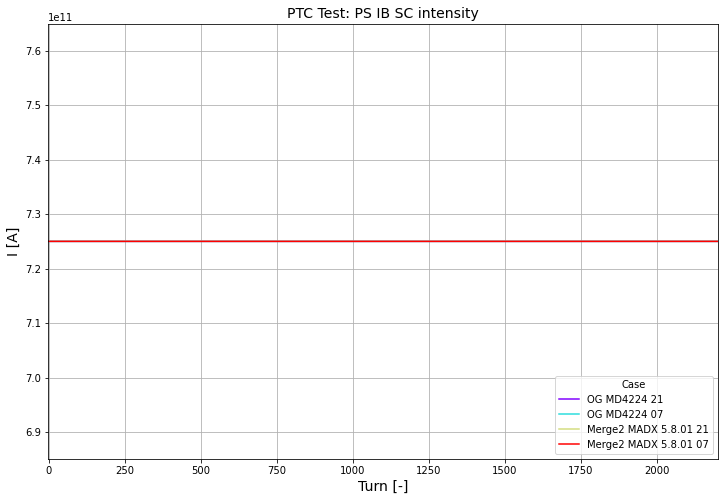

In [27]:
parameter = 'intensity'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel('I [A]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

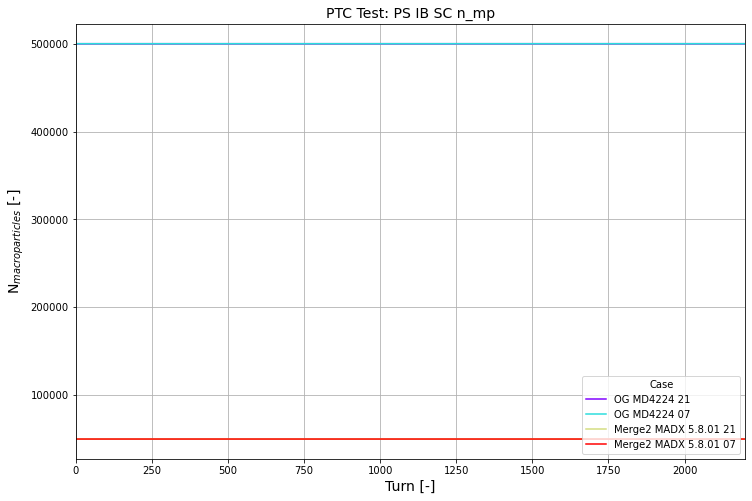

In [28]:
parameter = 'n_mp'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'N$_{macroparticles}$ [-]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

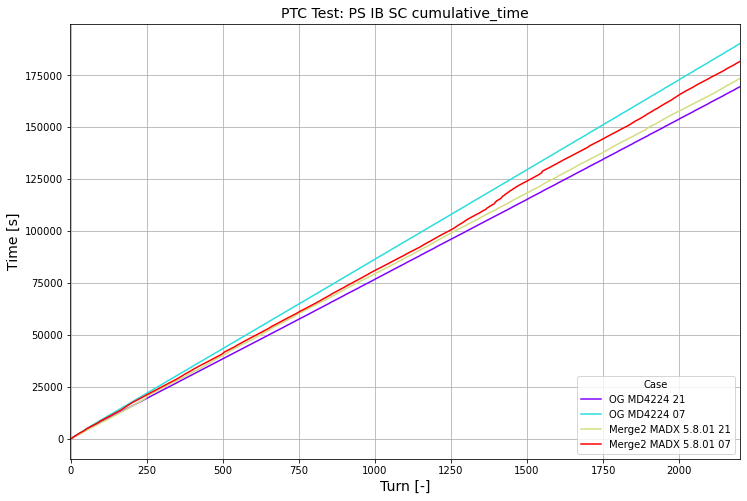

In [29]:
parameter = 'cumulative_time'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel('Time [s]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

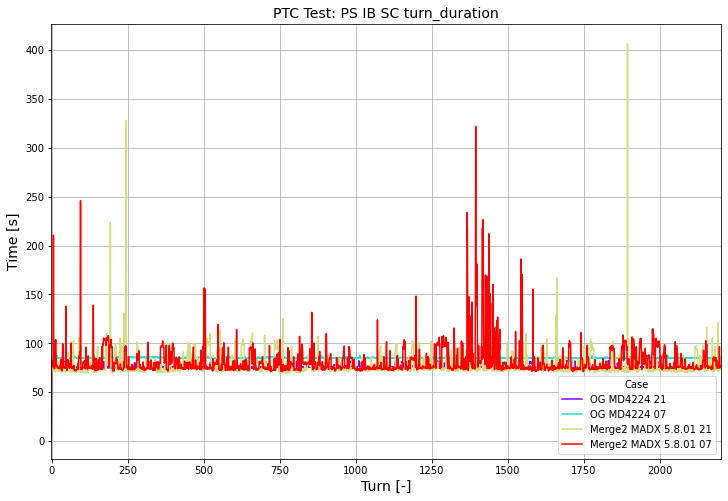

In [30]:
parameter = 'turn_duration'

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel('Time [s]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

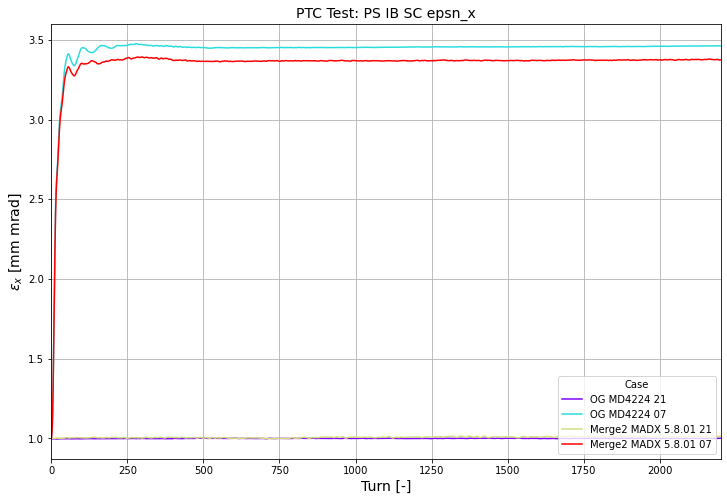

In [31]:
parameter = 'epsn_x'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

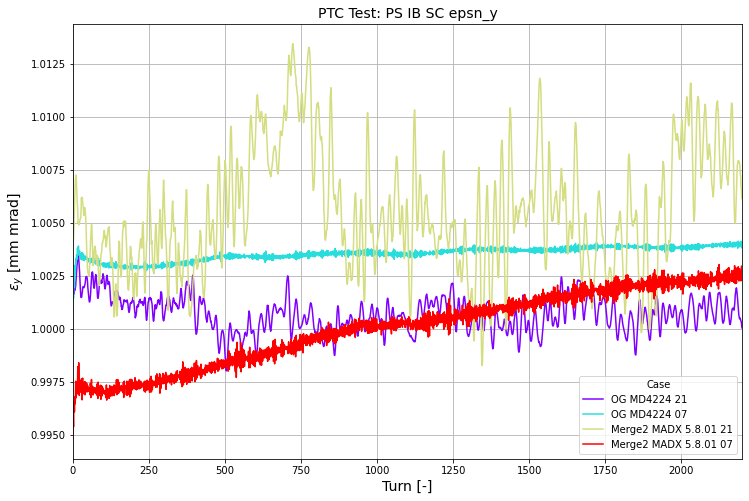

In [32]:
parameter = 'epsn_y'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

OG MD4224 21 Average  epsn_y  =  1.0  range =  0.00169  =  0.169 %
OG MD4224 07 Average  epsn_y  =  2.23  range =  1.24  =  55.400000000000006 %
Merge2 MADX 5.8.01 21 Average  epsn_y  =  1.01  range =  0.00721  =  0.714 %
Merge2 MADX 5.8.01 07 Average  epsn_y  =  2.19  range =  1.2  =  54.800000000000004 %


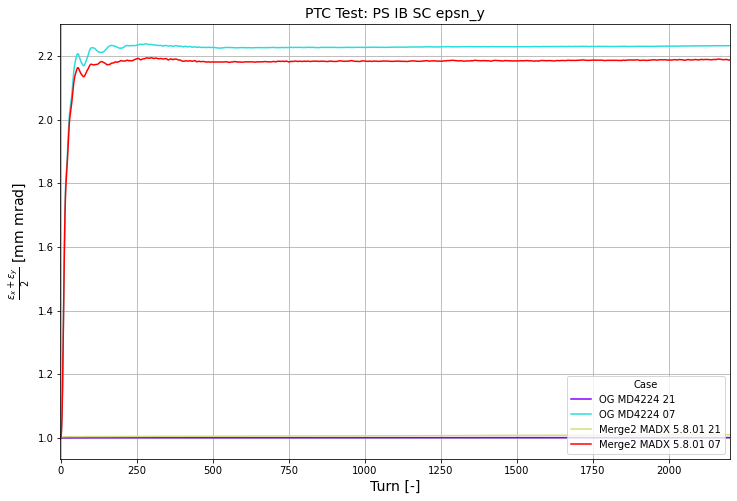

In [33]:
parameter1 = 'epsn_x'
parameter2 = 'epsn_y'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
    x = np.array(dd1[key]['turn'][0])
    y = np.array((dd1[key][parameter1][0]*multi + dd1[key][parameter2][0]*multi)/2)
    av_ = np.mean(y[-100])
    rang_ = np.abs(np.max(y) - np.min(y))
    print(key, 'Average ', parameter, ' = ' , \
    str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%')
    lab_ = key
    ax1.plot(x, y, label=lab_, color=colors[c_it]);
    c_it = c_it + 1;   
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '_average_emittance.png'
plt.savefig(savename);

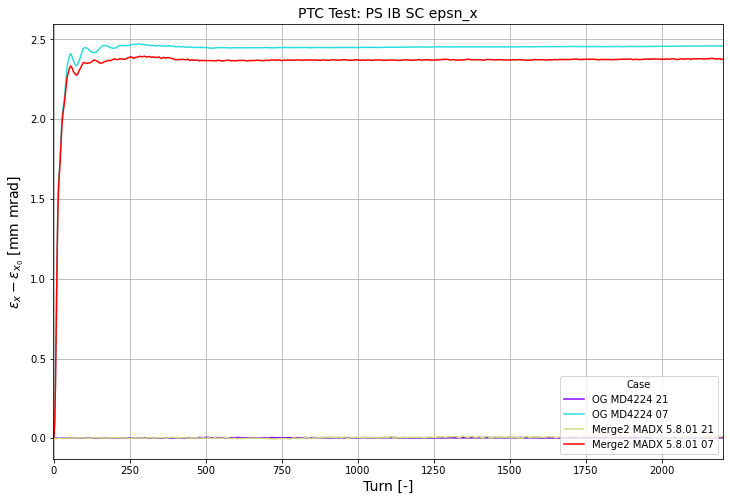

In [34]:
parameter = 'epsn_x'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x-\epsilon_{x_0}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
    lab_ = key
    ax1.plot(dd1[key]['turn'][0], ((dd1[key][parameter][0]*multi)-(dd1[key][parameter][0][0]*multi)), label=key, color=colors[c_it]);
    c_it = c_it + 1;   
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '_growth_cf.png'
plt.savefig(savename);

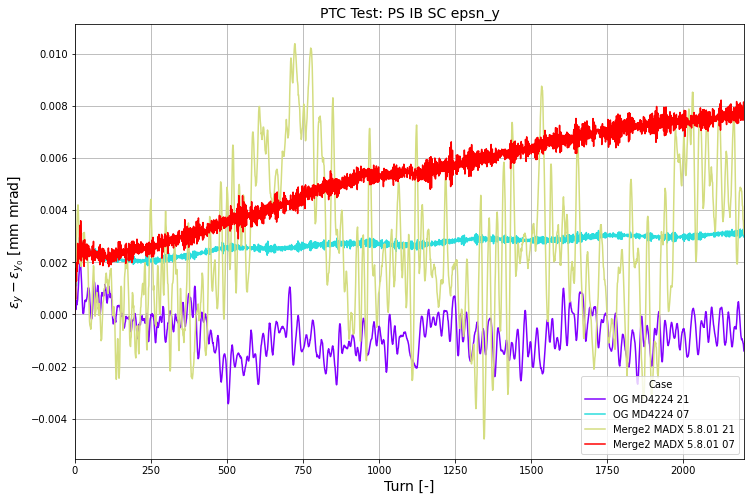

In [35]:
parameter = 'epsn_y'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k', figsize=(fig_x, fig_y))
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y-\epsilon_{y_0}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
    lab_ = key
    ax1.plot(dd1[key]['turn'][0], ((dd1[key][parameter][0]*multi)-(dd1[key][parameter][0][0]*multi)), label=key, color=colors[c_it]);
    c_it = c_it + 1;   
        
ax1.legend(loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '_growth_cf.png'
plt.savefig(savename);

# Conclusion

### Stage 2 of merge
- All beam sizes, beta functions, dispersions, emittances, etc are in good agreement
- The merged PyORBIT is clearly not in agreement with benchmarked simulations
- We must address the difference - it is likely that this will be in the PyORBIT PTC library python script